DC_GAN.
Introducción:

En este proyecto, se ha desarrollado y entrenado un Generador Adversarial (GAN) de estructura DC (Deep Convolutional) utilizando un conjunto de datos de caras de los personajes de Los Simpsons. El objetivo principal es que el GAN aprenda y sea capaz de regenerar de manera realista las caras de estos personajes icónicos. Para lograrlo, se ha empleado un enfoque meticuloso que incluye capas convolucionales profundas, técnicas de regularización y una función de pérdida diseñada específicamente para capturar las características distintivas de las caras de Los Simpsons. El resultado esperado es un modelo generativo efectivo que pueda producir imágenes de caras de Los Simpsons coherentes y fieles al estilo visual de la serie animada.

El data set se encuentra en: "https://www.kaggle.com/datasets/kostastokis/simpsons-faces"

**Modelo DC (Deep Convolutional)**

**Capa de Entrada:**
- Formato de entrada: Imágenes de tamaño (64, 64, 3) (ancho x alto x canales RGB).

**Capas Convolucionales:**
- Capa 1:
  - Número de filtros: 64
  - Tamaño del kernel: 4x4
  - Stride: 2
  - Padding: "same"
  - Función de activación: LeakyReLU con pendiente negativa de 0.2
- Capa 2:
  - Número de filtros: 128
  - Tamaño del kernel: 4x4
  - Stride: 2
  - Padding: "same"
  - Función de activación: LeakyReLU con pendiente negativa de 0.2
- Capa 3:
  - Número de filtros: 128
  - Tamaño del kernel: 4x4
  - Stride: 2
  - Padding: "same"
  - Función de activación: LeakyReLU con pendiente negativa de 0.2

**Capas Restantes:**
- Capa de Flatten: Transforma la salida de las capas convolucionales en un vector unidimensional.
- Capa de Dropout: Ayuda a prevenir el sobreajuste, con una tasa de dropout del 20%.
- Capa Densa de Salida: Una neurona con activación sigmoidal para la clasificación binaria entre imágenes reales y generadas.

Este modelo DC utiliza capas convolucionales para extraer características de las imágenes de entrada y una estructura profunda para aprender representaciones discriminativas en el contexto de una GAN.

Como ultimo punto de consideracion la funcion de perdida que se utilizara para evaluar el modelo sera la de BinaryCrossentropy.


In [ ]:
#Si no se cuenta con la version necesaria de keras, esta se debe de actulizar
#pip install --upgrade tensorflow keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
#Bibliotecas que se van a implementar
import keras
import tensorflow as tf

from keras import layers
from keras import ops
import matplotlib.pyplot as plt
import os
import gdown
from zipfile import ZipFile

In [ ]:
#Vamos a descomprimir nuestros datos
#!unzip "/content/drive/MyDrive/Colab Notebooks/Deep_learning/Gan/cropped.zip"

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: cropped/5389.png        
  inflating: cropped/539.png         
  inflating: cropped/5390.png        
  inflating: cropped/5391.png        
  inflating: cropped/5392.png        
  inflating: cropped/5393.png        
  inflating: cropped/5394.png        
  inflating: cropped/5395.png        
  inflating: cropped/5396.png        
  inflating: cropped/5397.png        
  inflating: cropped/5398.png        
  inflating: cropped/5399.png        
  inflating: cropped/54.png          
  inflating: cropped/540.png         
  inflating: cropped/5400.png        
  inflating: cropped/5401.png        
  inflating: cropped/5402.png        
  inflating: cropped/5403.png        
  inflating: cropped/5404.png        
  inflating: cropped/5405.png        
  inflating: cropped/5406.png        
  inflating: cropped/5407.png        
  inflating: cropped/5408.png        
  inflating: cropped/5409.png        
  inflating: cropped/541.pn

 Se utiliza la función image_dataset_from_directory de Keras para cargar el dataset de imágenes.
label_mode=None indica que las imágenes no tienen etiquetas asociadas en este caso específico.
image_size=(64, 64) especifica el tamaño al que se redimensionarán todas las imágenes del dataset.
batch_size=32 indica que se utilizará un tamaño de lote de 32 imágenes para el entrenamiento.

In [ ]:
dataset = keras.utils.image_dataset_from_directory(
    "/content/cropped", label_mode=None, image_size=(64, 64), batch_size=32
)
dataset = dataset.map(lambda x: x / 255.0)


Found 9877 files.


Visualizemos un ejemplo de las caras a generar

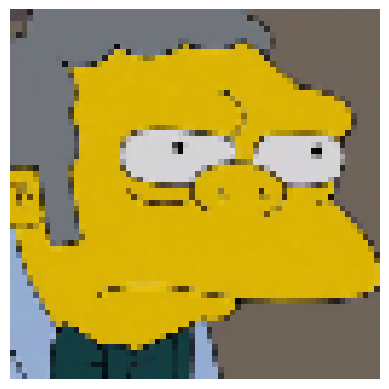

In [ ]:
for x in dataset:
    plt.axis("off")
    plt.imshow((x.numpy() * 255).astype("int32")[1])
    break

A continuacion tenemos nuestro modelo de discriminacion que detectara si nuestra imagen es real o creada, su estructura es la siguente:

- **Input Shape:** El modelo recibe imágenes de tamaño (64, 64, 3), donde 3 representa los canales de color RGB.
- **Capas Convolucionales:** Se utilizan varias capas Conv2D con diferentes filtros y tamaños de kernel para extraer características de las imágenes.
    - Capa 1: 64 filtros con un kernel de tamaño 4x4, stride de 2 y padding "same" para mantener el tamaño.
    - Capa 2: 128 filtros con un kernel de tamaño 4x4, stride de 2 y padding "same".
    - Capa 3: 128 filtros con un kernel de tamaño 4x4, stride de 2 y padding "same".
- **Función de Activación:** Se utiliza la función de activación LeakyReLU con un factor de pendiente negativo de 0.2 después de cada capa convolucional para introducir no linealidades.
- **Flatten y Dropout:** Se aplica una capa Flatten para convertir la salida de las capas convolucionales en un vector unidimensional, seguida de una capa Dropout con una tasa de dropout del 20% para regularizar la red y prevenir el sobreajuste.
- **Capa Dense y Activación Sigmoid:** Finalmente, se tiene una capa Dense con 1 neurona y activación sigmoidal para clasificar la imagen como real (1) o falsa (0).


In [ ]:
discriminator = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)
discriminator.summary()


Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 404,801 (1.54 MB)

 Trainable params: 404,801 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

Ahora se viene el importatne, el modelo generador encargado de hacer las

- **Input Shape:** El generador recibe vectores latentes de dimensión 128 como entrada, que representan puntos en el espacio latente.
- **Capa Dense y Reshape:** Se utiliza una capa Dense para transformar los vectores latentes en un tensor de tamaño 8x8x128 (8x8 imágenes con 128 canales).
- **Capas Conv2DTranspose:** A continuación, se aplican varias capas Conv2DTranspose para "desconvolucionar" el tensor y aumentar su tamaño hasta obtener una imagen de salida.
    - Capa 1: 128 filtros con un kernel de tamaño 4x4, stride de 2 y padding "same" para aumentar el tamaño del tensor.
    - Capa 2: 256 filtros con un kernel de tamaño 4x4, stride de 2 y padding "same".
    - Capa 3: 512 filtros con un kernel de tamaño 4x4, stride de 2 y padding "same".
- **Función de Activación:** Se utiliza la función de activación LeakyReLU con un factor de pendiente negativo de 0.2 después de cada capa Conv2DTranspose para introducir no linealidades.
- **Capa de Salida:** Finalmente, se tiene una capa Conv2D con 3 filtros (correspondientes a los canales RGB) y un kernel de tamaño 5x5 con activación sigmoidal para generar la imagen de salida con valores de píxel en el rango [0, 1].



In [ ]:
latent_dim = 128

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(8 * 8 * 128),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ],
    name="generator",
)
generator.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 8192)                │       1,056,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 16, 16, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 32, 32, 256)         │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 64, 64, 512)         │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 64, 64, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 3)           │          38,403 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,979,651 (15.18 MB)

 Trainable params: 3,979,651 (15.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.seed_generator = keras.random.SeedGenerator(1337)

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = ops.shape(real_images)[0]
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )

        # Decode them to fake images
        generated_images = self.generator(random_latent_vectors)

        # Combine them with real images
        combined_images = ops.concatenate([generated_images, real_images], axis=0)

        # Assemble labels discriminating real from fake images
        labels = ops.concatenate(
            [ops.ones((batch_size, 1)), ops.zeros((batch_size, 1))], axis=0
        )
        # Add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )

        # Assemble labels that say "all real images"
        misleading_labels = ops.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
        }

Explicando un poco de lo realizado anteriormente:


Se crea una clase GAN que contiene el discriminador, el generador y la dimensión latente necesaria para generar datos sintéticos.

Se configura la GAN para el entrenamiento especificando los optimizadores y la función de pérdida para el discriminador y el generador.


Genera puntos aleatorios en el espacio latente y los usa para crear imágenes sintéticas a través del generador.

Combina estas imágenes sintéticas con imágenes reales para entrenar al discriminador en la discriminación entre imágenes reales y sintéticas.

Luego, entrena al generador para que engañe al discriminador y genere imágenes que parezcan reales, ajustando los pesos del generador pero no del discriminador.

In [ ]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim
        self.seed_generator = keras.random.SeedGenerator(42)

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = keras.random.normal(
            shape=(self.num_img, self.latent_dim), seed=self.seed_generator
        )
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = keras.utils.array_to_img(generated_images[i])
            img.save("generated_img_%03d_%d.png" % (epoch, i))

*En* la clase GANMonitor:
Esta clase es un callback de Keras que se llama al final de cada época durante el entrenamiento de la GAN.
Genera un número específico (num_img) de imágenes sintéticas utilizando el generador de la GAN y las guarda en archivos PNG al final de cada época.

In [ ]:
epochs = 30

gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

gan.fit(
    dataset, epochs=epochs, callbacks=[GANMonitor(num_img=10, latent_dim=latent_dim)]
)

Epoch 1/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 131s 347ms/step - d_loss: 0.5478 - g_loss: 1.6899
Epoch 2/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 87s 282ms/step - d_loss: 0.4982 - g_loss: 1.5589
Epoch 3/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 87s 281ms/step - d_loss: 0.2641 - g_loss: 2.6241
Epoch 4/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 87s 281ms/step - d_loss: 0.5030 - g_loss: 1.5166
Epoch 5/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 142s 282ms/step - d_loss: 0.5800 - g_loss: 1.0708
Epoch 6/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 142s 283ms/step - d_loss: 0.4845 - g_loss: 2.3734
Epoch 7/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 142s 283ms/step - d_loss: 0.6589 - g_loss: 1.3365
Epoch 8/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 87s 281ms/step - d_loss: 0.6080 - g_loss: 1.1845
Epoch 9/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 87s 282ms/step - d_loss: 0.6658 - g_loss: 1.1906
Epoch 10/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 87s 282ms/step - d_loss: 0.4549 - g_loss: 1.8359
Epoch 11/30
309/309 ━━━━━━━━━━━━━━━━━━━━ 87s 281ms/step - d_loss: 0.5674 - g_loss: 1.2631
Epoch 12/30
309

Veamos 10 de las imagenes generadas

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


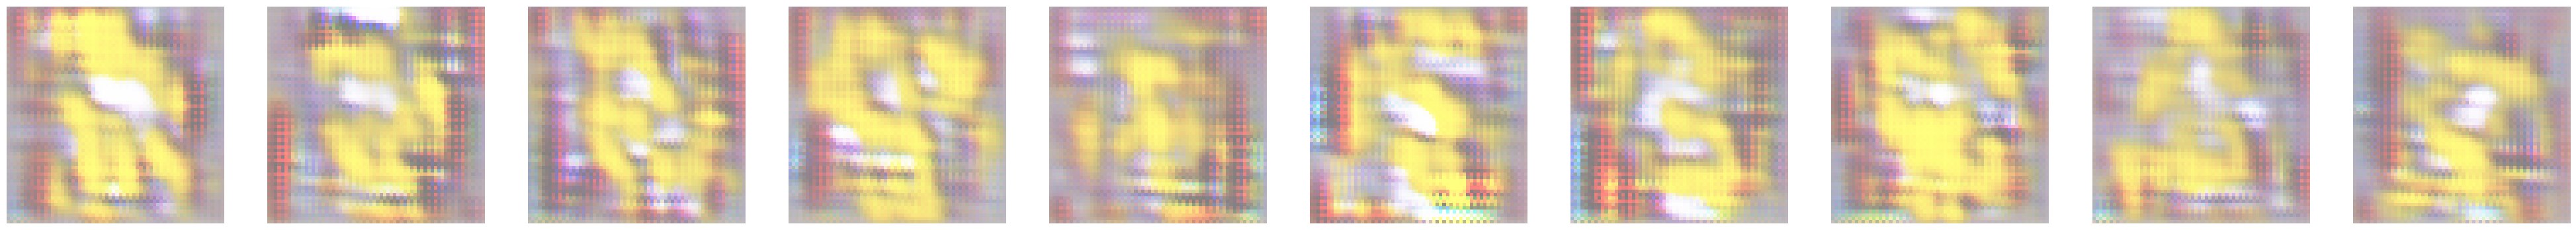

In [ ]:
import matplotlib.pyplot as plt

num_images_to_generate = 10
latent_dim = 128

random_latent_vectors = tf.random.normal(shape=(num_images_to_generate, latent_dim))

generated_images = generator.predict(random_latent_vectors)

# Muestra las imágenes generadas
plt.figure(figsize=(50, 50))
for i in range(num_images_to_generate):
    plt.subplot(1, num_images_to_generate, i + 1)
    plt.imshow(generated_images[i] * 0.5 + 0.5)  # Escala las imágenes al rango [0, 1]
    plt.axis("off")
plt.show()


Vemos que anteriormente las imagenes generadas por el modelo con 30 epocas, podemos concluir que el modelo aprendio a generar imagenes innegablemente, pero el como lo hizo es cuestionable, pero recordar el limite computacional que tiene y la cantidad de epocas para entrenar, aun con todas estas limitaciones se observa un GAN , que con un poco de ajustes sera muy bueno para generar caras de Los Simpsoms.